### Install Libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [2]:
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10) #For increasing inline plot size
import glob
import os

##### Linking Path Folder

In [3]:
DATASET_DIR = "/Users/royku/Sem II Modules/Project Prep/RA/Living Lab Grant/Data/New Data/Img"

li = os.listdir(DATASET_DIR)

In [4]:
len(li) #Fetches the total number of car images in the folder

7

In [5]:
'''from tensorflow.keras.preprocessing import image #To read image'''

'from tensorflow.keras.preprocessing import image #To read image'

In [6]:
'''car_images = []

for img_path in glob.glob(DATASET_DIR + "/Train_Indian Number Plates/*"):
    car_images.append(image.load_img(str(img_path), target_size = (350,350,3)))'''

'car_images = []\n\nfor img_path in glob.glob(DATASET_DIR + "/Train_Indian Number Plates/*"):\n    car_images.append(image.load_img(str(img_path), target_size = (350,350,3)))'

In [7]:
'''car_images[200]'''

'car_images[200]'

In [8]:
'''type(car_images[200])'''

'type(car_images[200])'

## Check Image, Grayscale and Blur

#### Reading all images from path folder

In [24]:
img = []

for k in range(0,len(li)):
    images = cv2.imread('/Users/royku/Sem II Modules/Project Prep/RA/Living Lab Grant/Data/New Data/Img/' + li[k])
    img.append(images)    

In [86]:
image = img[3]

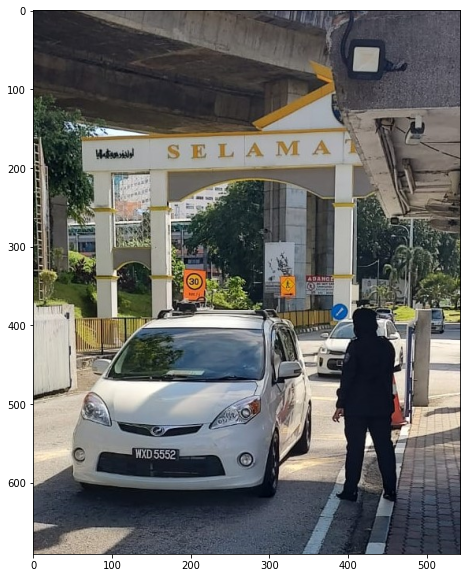

In [87]:
lop = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = np.array(lop)

plt.imshow(pixels)

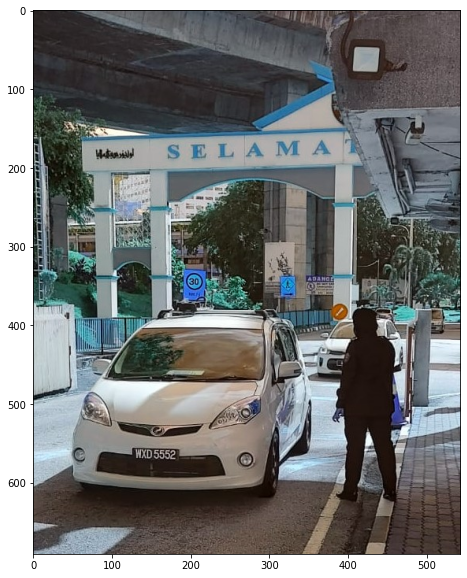

In [88]:
plt.imshow(image)

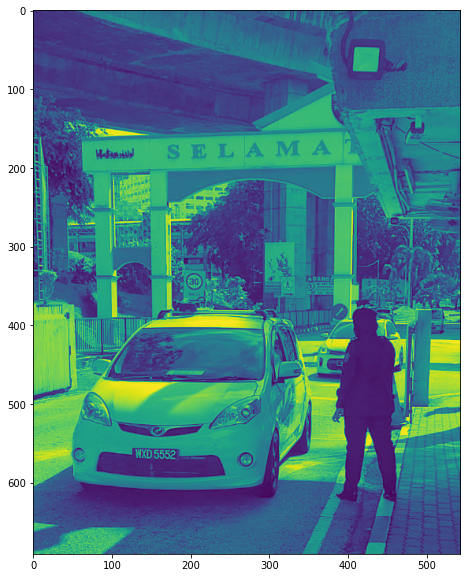

In [89]:
converted = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(converted) #cv2.cvtColor(converted, cv2.COLOR_BGR2RGB)

## Filtering

Why using bilateral filtering?-
https://www.geeksforgeeks.org/python-bilateral-filtering/

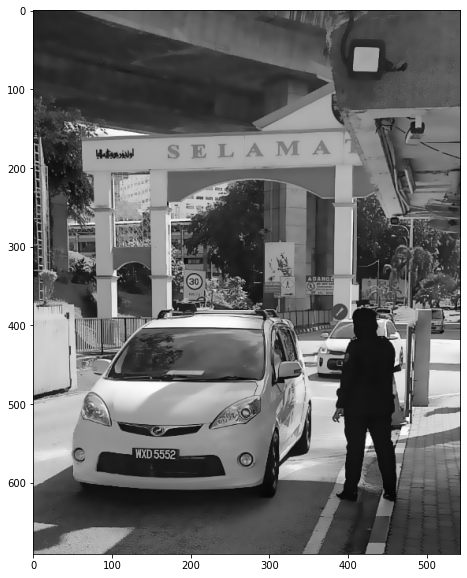

In [90]:
filtered = cv2.bilateralFilter(converted, 11, 17, 17) # Reduce Noise
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

### Checking Threshold value

In [91]:
'''ret, thresh = cv2.threshold(filtered, 127, 255, 0)'''

'ret, thresh = cv2.threshold(filtered, 127, 255, 0)'

In [92]:
'''for k in range(0,len(thresh)):
    print(thresh[k])'''

'for k in range(0,len(thresh)):\n    print(thresh[k])'

In [93]:
'''plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))'''

'plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))'

## Edge Detection

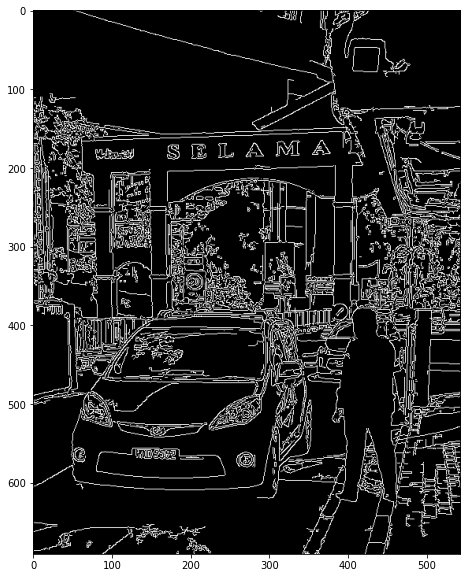

In [94]:
boundary = cv2.Canny(filtered,30,200) # Detect Edge #(apertureSize = 3, L2gradient = True)
plt.imshow(cv2.cvtColor(boundary, cv2.COLOR_BGR2RGB))

Real Time detection ref:
https://www.geeksforgeeks.org/real-time-edge-detection-using-opencv-python/

## Contours

In [95]:
contour_point = cv2.findContours(boundary.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = imutils.grab_contours(contour_point)
contour = sorted(contour, key=cv2.contourArea, reverse=True)[:20]

In [96]:
'''for c in contour:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    perimeter = cv2.arcLength(c , True)
    approx = cv2.approxPolyDP(c, 0.18*perimeter, True)
    
    adri = cv2.drawContours(image, [approx], 0 , (0,255,0),3)
    
    plt.imshow(cv2.cvtColor(adri, cv2.COLOR_BGR2RGB))'''

'for c in contour:\n    rect = cv2.minAreaRect(c)\n    box = cv2.boxPoints(rect)\n    box = np.int0(box)\n    \n    perimeter = cv2.arcLength(c , True)\n    approx = cv2.approxPolyDP(c, 0.18*perimeter, True)\n    \n    adri = cv2.drawContours(image, [approx], 0 , (0,255,0),3)\n    \n    plt.imshow(cv2.cvtColor(adri, cv2.COLOR_BGR2RGB))'

Contour Documentation:
https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html

In [97]:
plate_points = None
edge_point1 = None
for c in contour:
    perimeter = cv2.arcLength(c , True)
    approx = cv2.approxPolyDP(c, 0.2*perimeter, True)
    if len(approx) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate_points = image[y:y+h,x:x+w]
        edge_point1 = approx
        break

#cv2.imwrite('plate.png', plate_points)

In [98]:
edge_point1

In [99]:
edge_points = None
for con in contour:
    approx = cv2.approxPolyDP(con, 10, True)
    if len(approx) == 4:
        edge_points = approx
        break

In [100]:
type(edge_points)

numpy.ndarray

In [101]:
edge_points

array([[[408,  47]],

       [[406,  77]],

       [[436,  78]],

       [[439,  48]]], dtype=int32)

## Masking

In [102]:
if edge_points is not None:
    mask = np.zeros(converted.shape, np.uint8)
    plate = cv2.drawContours(mask, [edge_points], 0,255, -1)
else:
    pass

In [103]:
plate = cv2.bitwise_and(image, image, mask=mask)

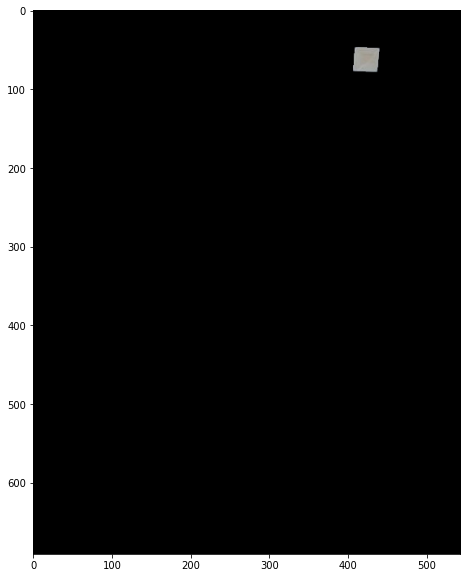

In [104]:
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))

In [105]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
plate= converted[x1:x2+1, y1:y2+1]

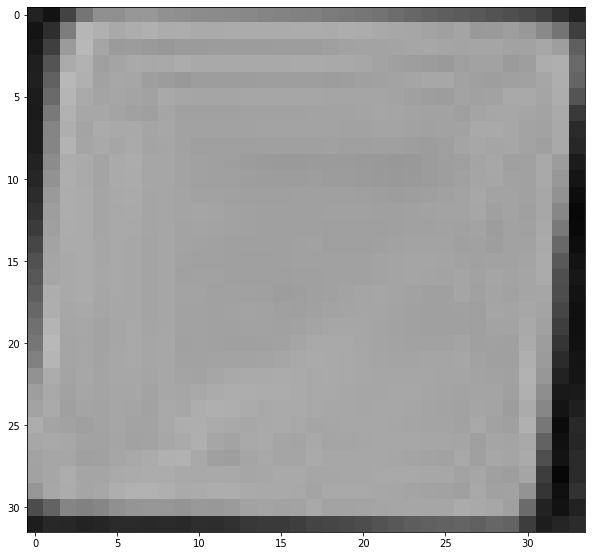

In [106]:
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))